In [1]:
import numpy as np
import matplotlib.cm as cmap
import time
import os.path
import scipy
import pickle as pickle
from struct import unpack
from brian2 import *
import brian2
from brian2tools import *
from PIL import Image

# FUNCTIONS

In [2]:
def edge_detection_kernel(img):
    source = np.copy(img)
    y = source.shape[0]
    x = source.shape[1]

    v_filter = np.array([[1,1,1], [1,0,1], [1,1,1]])
    h_filter = np.array([[0,0,0], [0,1,0], [0,0,0]])

    h_result = np.zeros((y,x))
    v_result = np.zeros((y,x))
    for i in range(1, y-1):
        for j in range(1, x-1):
            local = np.copy(source[i-1:i+2, j-1:j+2])
            h_result[i][j] = np.sum(local*h_filter)
            v_result[i][j] = np.sum(local*v_filter)
            
        
    v_result_ab = np.absolute(v_result)
    v_result_ab_f = v_result_ab - np.min(v_result_ab)
    
    h_result_ab = np.absolute(h_result)
    h_result_ab_f = h_result_ab - np.min(h_result_ab)
   
    return (v_result_ab_f, h_result_ab_f)

# CODE

In [3]:
stimuli_file = './pic_300.tif'

fig_num = 1

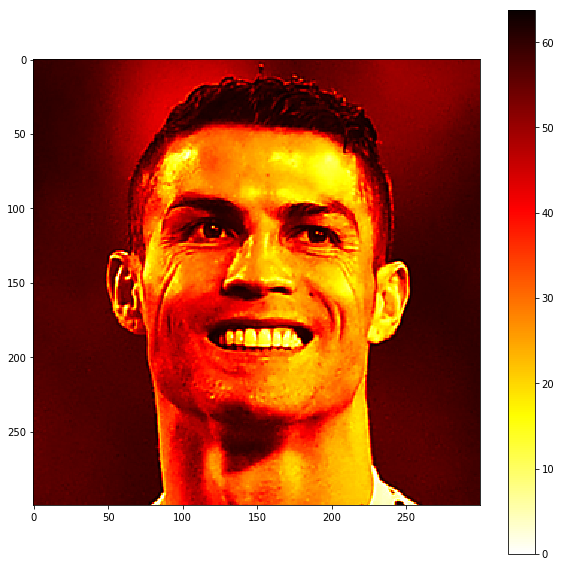

In [4]:
img = Image.open(stimuli_file)
img.load()
img_arr = np.asarray(img, dtype="int32")
stimuli = np.absolute(img_arr - 255)/4     # 28,28 grid values from 0 to 63.75

fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(stimuli, vmin = np.min(stimuli), vmax = np.max(stimuli) , cmap = cmap.get_cmap('hot_r'))
colorbar(im2)
fig_num += 1

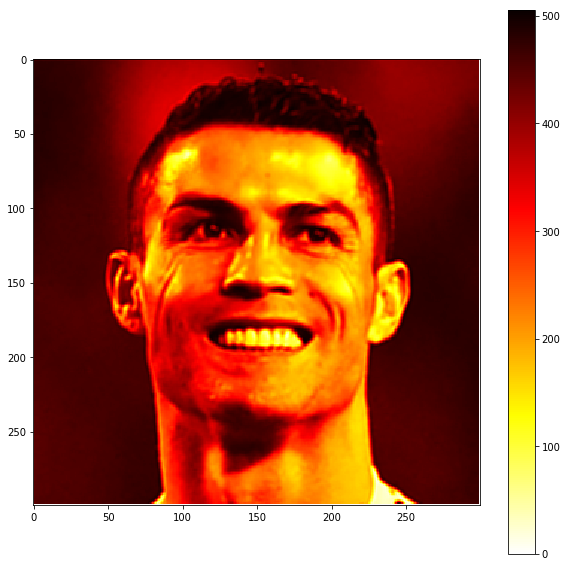

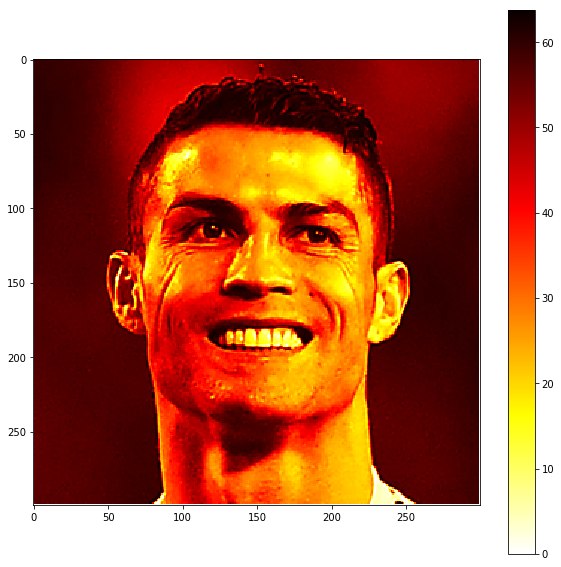

In [5]:
v_edge_stimuli, h_edge_stimuli = edge_detection_kernel(stimuli) 

fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(v_edge_stimuli, vmin = np.min(v_edge_stimuli), vmax = np.max(v_edge_stimuli) , cmap = cmap.get_cmap('hot_r'))
colorbar(im2)
fig_num += 1

fig = figure(fig_num, figsize = (10, 10))
im2 = imshow(h_edge_stimuli, vmin = np.min(h_edge_stimuli), vmax = np.max(h_edge_stimuli) , cmap = cmap.get_cmap('hot_r'))
colorbar(im2)
fig_num += 1

In [6]:
# source = np.copy(stimuli)
# maxx = np.max(source)
# minn = np.min(source)
# s_max = 20
# s_min = 0
# c_max = 200
# c_min = 0

# y = stimuli.shape[0]
# x = stimuli.shape[1]

# for i in range(y-2):
#     for j in range(x-2):
#         local = np.copy(source[i:i+3, j:j+3])
#         center = local[1][1]
#         surround = s_min + np.absolute(local-maxx)*(s_max-s_min)/(maxx-minn)
#         total = np.sum(surround)-surround[1][1] + center
#         source[i+1][j+1] = total/9
#         surround[1][1] = center
#         print(surround)